# Defining & evaluating parameterizations with pyqg

In this notebook, we'll define a new parameterization, test it, and hopefully make it clear how you can define (or learn) your own!

## Imports

In [1]:
import fsspec
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import pyqg
import pyqg.diagnostic_tools
from pyqg.diagnostic_tools import calc_ispec

%matplotlib inline

## Defining a parameterization

Here we'll define a parameterization of the subgrid forcing of potential vorticity (learned by symbolic regression):

In [3]:
class HybridSymbolic(pyqg.QParameterization):
    def __init__(self, weights=None):
        if weights is None:
            self.weights = np.array([
                [ 1.4077349573135765e+07,  1.9300721349777748e+15,
                  2.3311494532833229e+22,  1.1828024430000000e+09,
                  1.1410567621344224e+17, -6.7029178551956909e+10,
                  8.9901990193476257e+10],
                [ 5.196460289865505e+06,  7.031351150824246e+14,
                  1.130130768679029e+11,  8.654265196250000e+08,
                  7.496556547888773e+16, -8.300923156070618e+11,
                  9.790139405295905e+11]
            ]).T[:,:,np.newaxis,np.newaxis]
        else:
            self.weights = weights

    def extract_features(self, m):
        # Define some helper functions for taking spectral differential
        # operations with as few FFTs/IFFTs as possible
        ik = m.k * 1j
        il = m.l * 1j
        real = lambda q: q if q.shape == m.q.shape else m.ifft(q)
        spec = lambda q: q if q.shape != m.q.shape else m.fft(q)
        ddx = lambda q: ik * spec(q)
        ddy = lambda q: il * spec(q)    
        laplacian = lambda q: (ik**2 + il**2) * spec(q)
        adv_real = lambda qr: ddx(m.ufull * qr) + ddy(m.vfull * qr)
        advect = lambda q: adv_real(real(q))

        # Compute basis features
        lap1_adv_q = laplacian(advect(m.q))
        lap2_adv_q = laplacian(lap1_adv_q)
        lap3_adv_q = laplacian(lap2_adv_q)
        lap2_q = laplacian(laplacian(m.q))
        lap3_q = laplacian(lap2_q)

        return np.array([
            real(feature) for feature in [ # convert them to real space
                lap1_adv_q,
                lap2_adv_q,
                lap3_adv_q,
                lap2_q,
                lap3_q,
                advect(advect(ddx(laplacian(m.v)))),
                advect(advect(ddy(laplacian(m.u)))),
            ]
        ])

    def __call__(self, m):
        return (self.weights * self.extract_features(m)).sum(axis=0)

    def __repr__(self):
        return 'HybridSymbolic'

More templates can be seen here: https://github.com/pyqg/pyqg/blob/master/pyqg/parameterizations.py

## Run baseline simulations

In [4]:
year = 24*60*60*360.
common_params = dict(dt=3600., tmax=5*year, tavestart=2.5*year, twrite=25000)

In [5]:
%%time
m_lowres = pyqg.QGModel(nx=64, **common_params)
m_lowres.run()

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 4.47e-04, CFL: 0.049


CPU times: user 2min 49s, sys: 4min 26s, total: 7min 15s
Wall time: 38.2 s


In [6]:
%%time
m_highres = pyqg.QGModel(nx=256, **common_params)
m_highres.run()

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 6.92e-04, CFL: 0.230


CPU times: user 16min 48s, sys: 17min 51s, total: 34min 39s
Wall time: 7min 49s


We can see that the high-resolution simulation takes much longer than the low-resolution simulation to run.

## Run the parameterized simulations

In [7]:
%%time
m_param = pyqg.QGModel(nx=64, parameterization=HybridSymbolic(),
                       **common_params)
m_param.run()

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 5.92e-04, CFL: 0.051


CPU times: user 10min 1s, sys: 15min 35s, total: 25min 36s
Wall time: 2min 19s


In [12]:
def save_dataset(model, file):
    ds = model.to_dataset()
    ds = ds.drop_vars([k for k,v in ds.variables.items() if np.iscomplexobj(v)])
    ds.to_netcdf(file)

In [15]:
save_dataset(m_lowres, 'Data/lowres.nc')
save_dataset(m_highres, 'Data/highres.nc')
save_dataset(m_param, 'Data/param.nc')

In [17]:
lowres = xr.open_dataset('Data/lowres.nc')
highres = xr.open_dataset('Data/highres.nc')
param = xr.open_dataset('Data/param.nc')

The parameterized low-res simulation is in between.

## Plot some metrics

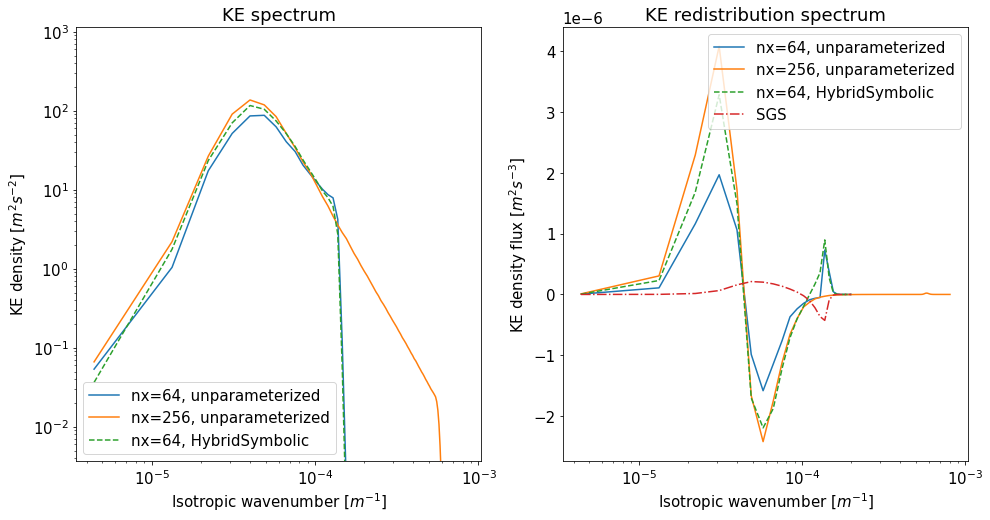

In [8]:
def plot_kwargs_for(m):
    return dict(
        label=f"nx={m.nx}, {m.parameterization or 'unparameterized'}",
        ls=('--' if m.parameterization else '-')
    )

with matplotlib.rc_context({'font.size': 15}):
    plt.figure(figsize=(16,8))

    plt.subplot(121, title="KE spectrum")
    for m in [m_lowres, m_highres, m_param]:
        k, spec = calc_ispec(m, m.get_diagnostic('KEspec').sum(0))
        plt.loglog(k, spec, **plot_kwargs_for(m))
    plt.legend()
    plt.xlabel("Isotropic wavenumber [$m^{-1}$]")
    plt.ylabel("KE density [$m^{2}s^{-2}$]")
    plt.ylim(spec[0]/10, spec.max()*10)

    plt.subplot(122, title="KE redistribution spectrum")
    for m in [m_lowres, m_highres, m_param]:
        k, spec = calc_ispec(m, m.get_diagnostic('KEflux'))
        plt.semilogx(k, spec, **plot_kwargs_for(m))
    k, spec = calc_ispec(m, m.get_diagnostic('paramspec_KEflux'))
    plt.semilogx(k, spec, label='SGS', ls='-.')
    plt.xlabel("Isotropic wavenumber [$m^{-1}$]")
    plt.ylabel("KE density flux [$m^{2}s^{-3}$]")
    plt.legend()

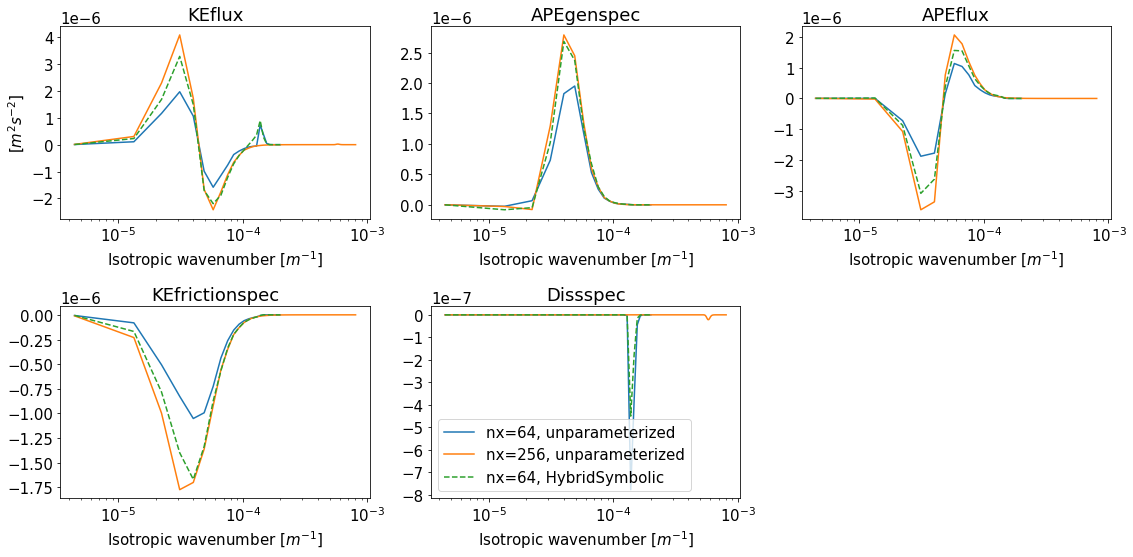

In [9]:
with matplotlib.rc_context({'font.size': 15}):
    plt.figure(figsize=(16,8))
    for i, label in enumerate(['KEflux', 'APEgenspec', 'APEflux', 'KEfrictionspec', 'Dissspec']):
        plt.subplot(2, 3, i+1, title=label)
        for j, m in enumerate([m_lowres, m_highres, m_param]):
            k, spec = calc_ispec(m, m.get_diagnostic(label))
            plt.semilogx(k, spec, **plot_kwargs_for(m))
        plt.xlabel("Isotropic wavenumber [$m^{-1}$]")
        if i == 0:
            plt.ylabel("[$m^{2}s^{-2}$]")
        if i == 4:
            plt.legend()
    plt.tight_layout()

We can quantify how much more similar the parameterized model is to the high-res model using similarity scores (max = 1, positive = closer than low-res, negative = further than low-res):

In [28]:
sim_scores = pyqg.diagnostic_tools.diagnostic_similarities(m_param, m_highres, m_lowres)
sim_scores

{'Ensspec1': 0.5577845308202023,
 'Ensspec2': 0.5196295449658188,
 'KEspec1': 0.6011464529535312,
 'KEspec2': 0.589850280630056,
 'EKEdiss': 0.6976122716934597,
 'KEfrictionspec': 0.5898502806300556,
 'EKE1': 0.6174155381441186,
 'EKE2': 0.6976122716934561,
 'Dissspec': 0.4620947885196903,
 'ENSDissspec': 0.46577330804697925,
 'entspec': 0.4260061056650336,
 'ENSflux': -0.16082658360869373,
 'ENSgenspec': 0.5619343336507574,
 'ENSfrictionspec': 0.5433876820115351,
 'APEgenspec': 0.5619343336507583,
 'APEflux': 0.48273084772218966,
 'KEflux': 0.4518552740260996,
 'APEgen': 0.8306548316733002}

# ADM parameterization

In [19]:
def Gaussian_Filter(w, m, FGR):
    w_fft = m.fft(w)
    Delta = m.dx * FGR
    k2 = m.k**2 + m.l**2
    G = np.exp(-k2*Delta**2/24)
    return m.ifft(G * w_fft)

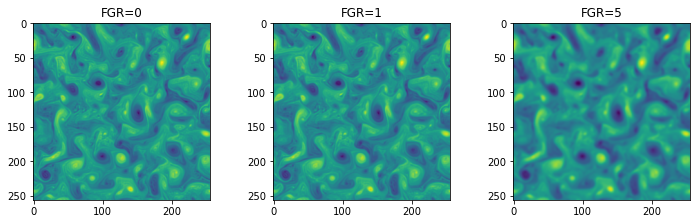

In [20]:
fig, ax = plt.subplots(1,3,figsize=(10,3), constrained_layout=True)
for i, FGR in enumerate([0,1,5]):
    ax[i].imshow(Gaussian_Filter(m_highres.q, m_highres, FGR)[0])
    ax[i].set_title(f'FGR={FGR}')

In [21]:
def deconvolve(w, m, FGR, order):
    wd = w
    r = w
    for j in range(order):
        r = r - Gaussian_Filter(r, m, FGR)
        wd = wd + r
    return wd

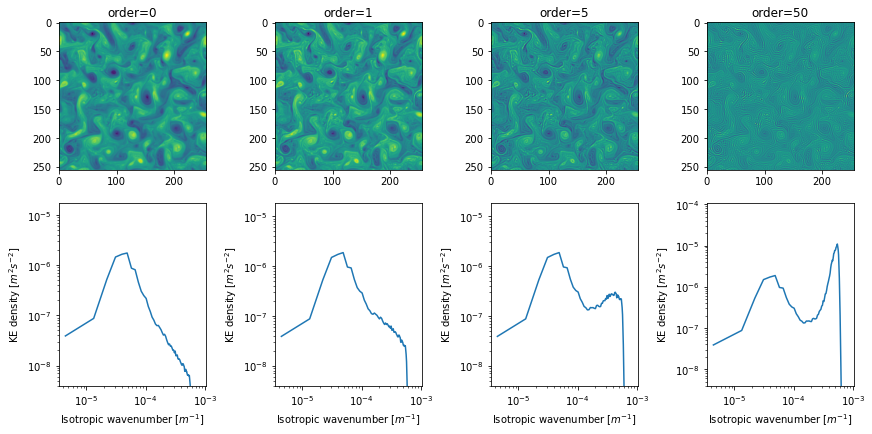

In [22]:
fig, ax = plt.subplots(2,4,figsize=(12,6), constrained_layout=True)
ax = ax.ravel()
for i, order in enumerate([0,1,5,50]):
    qd = deconvolve(m_highres.q, m_highres, 5.0, order)
    ax[i].imshow(qd[0])
    ax[i].set_title(f'order={order}')
    fft = m_highres.fft(qd)
    KEf = (np.abs(fft)**2/m_highres.M**2).sum(0)
    k, spec = calc_ispec(m_highres, KEf)
    ax[i+4].loglog(k,spec)
    ax[i+4].set_xlabel("Isotropic wavenumber [$m^{-1}$]")
    ax[i+4].set_ylabel("KE density [$m^{2}s^{-2}$]")
    ax[i+4].set_ylim(spec[0]/10, spec.max()*10)

In [23]:
q = m_highres.q
m = m_highres
FGR = 2
print(np.abs(deconvolve(q, m, FGR, 0) - q).max())
qf = Gaussian_Filter(q, m, FGR)
print(np.abs(deconvolve(qf, m, FGR, 100) - q).max())

0.0
8.131516293641283e-20


In [24]:
class ADM(pyqg.QParameterization):
    def __init__(self, FGR, order):
        self.FGR = FGR
        self.order = order
        
    def SFS(self, q, u, v, m):
        qf = Gaussian_Filter(q, m, self.FGR)
        uf = Gaussian_Filter(u, m, self.FGR)
        vf = Gaussian_Filter(v, m, self.FGR)
        quf = Gaussian_Filter(q*u, m, self.FGR)
        qvf = Gaussian_Filter(q*v, m, self.FGR)
        SFSu = qf*uf - quf
        SFSv = qf*vf - qvf
        return SFSu, SFSv    
    
    def __call__(self, m):
        qd = deconvolve(m.q, m, self.FGR, self.order)
        ud = deconvolve(m.u, m, self.FGR, self.order)
        vd = deconvolve(m.v, m, self.FGR, self.order)
        
        SFSu, SFSv = self.SFS(qd, ud, vd, m)
        
        ik = m.k * 1j
        il = m.l * 1j
        
        real = lambda q: q if q.shape == m.q.shape else m.ifft(q)
        spec = lambda q: q if q.shape != m.q.shape else m.fft(q)
        ddx = lambda q: real(ik * spec(q))
        ddy = lambda q: real(il * spec(q))
        
        return ddx(SFSu) + ddy(SFSv)

    def __repr__(self):
        return f'ADM, FGR={self.FGR}, order={self.order}'

In [25]:
%%time
m_adm = {}
for FGR in [1, 2, 3]:
    m_adm[f'FGR={FGR}'] = pyqg.QGModel(nx=64, parameterization=ADM(FGR=FGR, order=5),
                       **common_params)
    m_adm[f'FGR={FGR}'].run()

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 2.91e-04, CFL: 0.037


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 3.30e-04, CFL: 0.037


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 2.63e-04, CFL: 0.030


CPU times: user 35min 53s, sys: 52min 28s, total: 1h 28min 22s
Wall time: 9min 55s


In [30]:
m_adm['FGR=3']

In [31]:
def plot_models(m1, m2, m3):
    def plot_kwargs_for(m):
        return dict(
            label=f"nx={m.nx}, {m.parameterization or 'unparameterized'}",
            ls=('--' if m.parameterization else '-')
        )

    with matplotlib.rc_context({'font.size': 15}):
        plt.figure(figsize=(16,8))

        plt.subplot(121, title="KE spectrum")
        for m in [m1, m2, m3]:
            k, spec = calc_ispec(m, m.get_diagnostic('KEspec').sum(0))
            plt.loglog(k, spec, **plot_kwargs_for(m))
        plt.legend()
        plt.xlabel("Isotropic wavenumber [$m^{-1}$]")
        plt.ylabel("KE density [$m^{2}s^{-2}$]")
        plt.ylim(spec[0]/10, spec.max()*10)

        plt.subplot(122, title="KE redistribution spectrum")
        for m in [m1, m2, m3]:
            k, spec = calc_ispec(m, m.get_diagnostic('KEflux'))
            plt.semilogx(k, spec, **plot_kwargs_for(m))
        k, spec = calc_ispec(m, m.get_diagnostic('paramspec_KEflux'))
        plt.semilogx(k, spec, label='SGS', ls='-.')
        plt.xlabel("Isotropic wavenumber [$m^{-1}$]")
        plt.ylabel("KE density flux [$m^{2}s^{-3}$]")
        plt.legend()

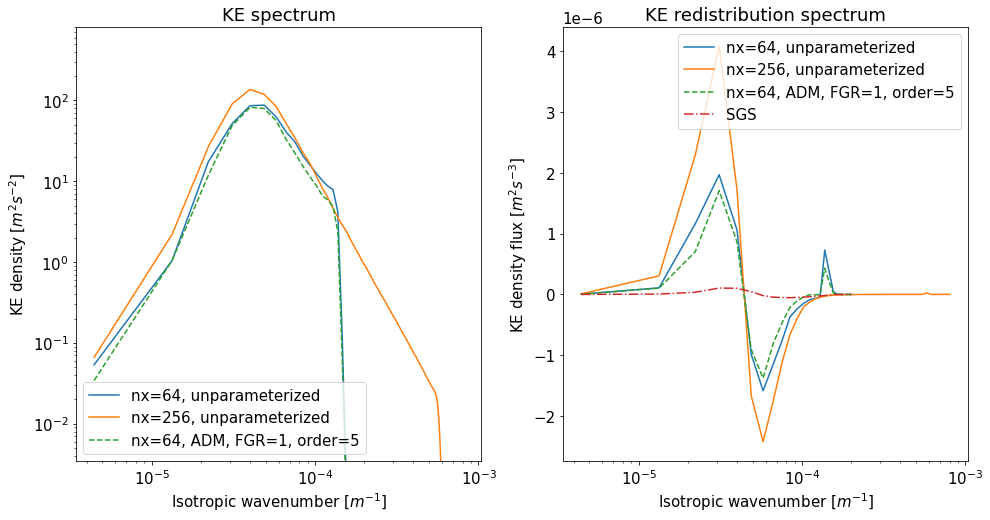

In [32]:
plot_models(m_lowres, m_highres, m_adm['FGR=1'])

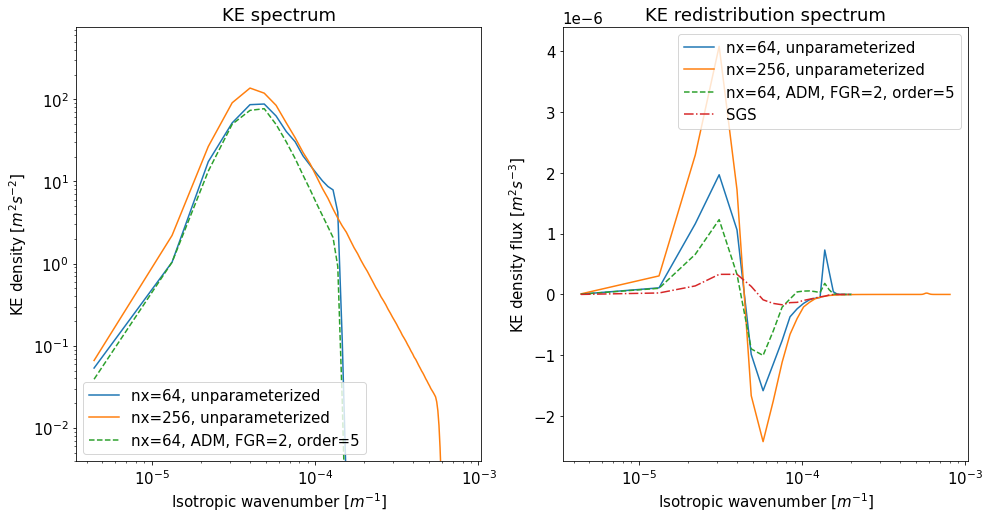

In [33]:
plot_models(m_lowres, m_highres, m_adm['FGR=2'])

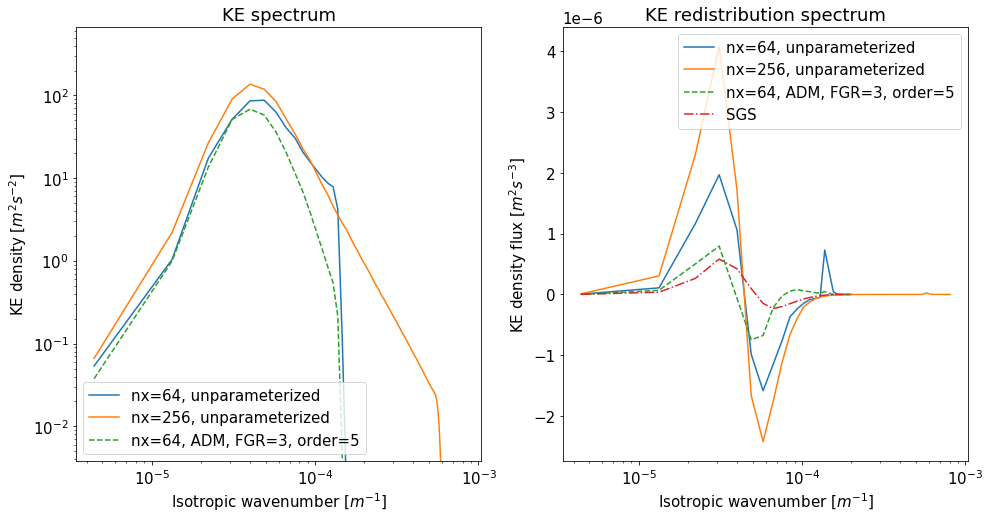

In [34]:
plot_models(m_lowres, m_highres, m_adm['FGR=3'])

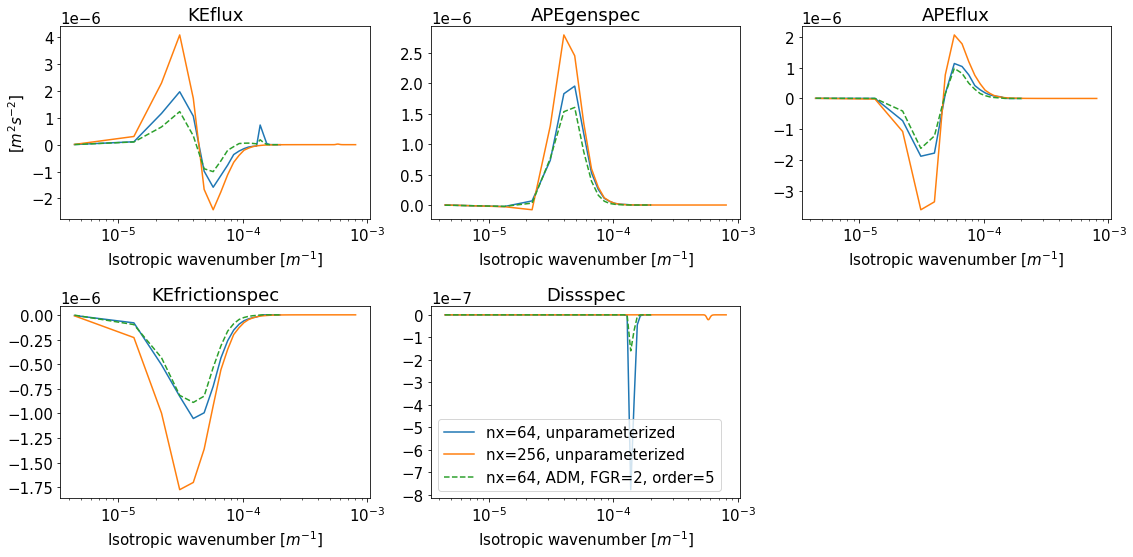

In [36]:
with matplotlib.rc_context({'font.size': 15}):
    plt.figure(figsize=(16,8))
    for i, label in enumerate(['KEflux', 'APEgenspec', 'APEflux', 'KEfrictionspec', 'Dissspec']):
        plt.subplot(2, 3, i+1, title=label)
        for j, m in enumerate([m_lowres, m_highres, m_adm['FGR=2']]):
            k, spec = calc_ispec(m, m.get_diagnostic(label))
            plt.semilogx(k, spec, **plot_kwargs_for(m))
        plt.xlabel("Isotropic wavenumber [$m^{-1}$]")
        if i == 0:
            plt.ylabel("[$m^{2}s^{-2}$]")
        if i == 4:
            plt.legend()
    plt.tight_layout()

In [37]:
sim_scores = pyqg.diagnostic_tools.diagnostic_similarities(m_adm['FGR=1'], m_highres, m_lowres)
sim_scores

{'Ensspec1': -0.16192345934575147,
 'Ensspec2': -0.1748138782135058,
 'KEspec1': -0.16386801286383568,
 'KEspec2': -0.13048602358209394,
 'EKEdiss': -0.2496290396934291,
 'KEfrictionspec': -0.1304860235820935,
 'EKE1': -0.3953523289764289,
 'EKE2': -0.24962903969342887,
 'Dissspec': 0.4485846964365109,
 'ENSDissspec': 0.4488754410594076,
 'entspec': -0.2711548644825674,
 'ENSflux': 0.28873481109994203,
 'ENSgenspec': -0.06118450799824604,
 'ENSfrictionspec': -0.16819165105445522,
 'APEgenspec': -0.06118450799824604,
 'APEflux': -0.13166014907171109,
 'KEflux': -0.1490440560538291,
 'APEgen': -0.20270374274786684}

In [38]:
sim_scores = pyqg.diagnostic_tools.diagnostic_similarities(m_adm['FGR=2'], m_highres, m_lowres)
sim_scores

{'Ensspec1': -0.29499453306703627,
 'Ensspec2': -0.27604401595488515,
 'KEspec1': -0.30234534078311115,
 'KEspec2': -0.17669755629502926,
 'EKEdiss': -0.3312289013569898,
 'KEfrictionspec': -0.17669755629502948,
 'EKE1': -0.6312795529906843,
 'EKE2': -0.33122890135699024,
 'Dissspec': 0.7988871219789355,
 'ENSDissspec': 0.7995371989018327,
 'entspec': -0.5190930095571145,
 'ENSflux': 0.4099550581269553,
 'ENSgenspec': -0.36264465788577693,
 'ENSfrictionspec': -0.2958164368237808,
 'APEgenspec': -0.36264465788577716,
 'APEflux': -0.3270923680688138,
 'KEflux': -0.27829668994000345,
 'APEgen': -0.6547117145421728}

In [39]:
sim_scores = pyqg.diagnostic_tools.diagnostic_similarities(m_adm['FGR=3'], m_highres, m_lowres)
sim_scores

{'Ensspec1': -0.5699082315351645,
 'Ensspec2': -0.47490982073356713,
 'KEspec1': -0.5917818885032982,
 'KEspec2': -0.2656978673763781,
 'EKEdiss': -0.5015218796631997,
 'KEfrictionspec': -0.2656978673763781,
 'EKE1': -1.0559984844274144,
 'EKE2': -0.5015218796631982,
 'Dissspec': 0.9568317235960455,
 'ENSDissspec': 0.9571122219578334,
 'entspec': -1.0127453631014616,
 'ENSflux': 0.3256174465311711,
 'ENSgenspec': -0.6113891880517757,
 'ENSfrictionspec': -0.43978651461249485,
 'APEgenspec': -0.6113891880517746,
 'APEflux': -0.5129501211474583,
 'KEflux': -0.44217956610495013,
 'APEgen': -1.0552542080377036}

# Reynolds stress model

In [40]:
class Reynolds_stress(pyqg.QParameterization):
    def __init__(self, FGR, Csim):
        self.FGR = FGR
        self.Csim = Csim
        
    def SFS(self, q, u, v, m):
        qf = Gaussian_Filter(q, m, self.FGR)
        uf = Gaussian_Filter(u, m, self.FGR)
        vf = Gaussian_Filter(v, m, self.FGR)
        quf = Gaussian_Filter(q*u, m, self.FGR)
        qvf = Gaussian_Filter(q*v, m, self.FGR)
        SFSu = qf*uf - quf
        SFSv = qf*vf - qvf
        return SFSu, SFSv    
    
    def __call__(self, m):
        qr = m.q - Gaussian_Filter(m.q, m, self.FGR)
        ur = m.u - Gaussian_Filter(m.u, m, self.FGR)
        vr = m.v - Gaussian_Filter(m.v, m, self.FGR)
        
        SFSu, SFSv = self.SFS(qr, ur, vr, m)
        
        ik = m.k * 1j
        il = m.l * 1j
        
        real = lambda q: q if q.shape == m.q.shape else m.ifft(q)
        spec = lambda q: q if q.shape != m.q.shape else m.fft(q)
        ddx = lambda q: real(ik * spec(q))
        ddy = lambda q: real(il * spec(q))
        
        return self.Csim*(ddx(SFSu) + ddy(SFSv))

    def __repr__(self):
        return f'Reynolds, FGR={self.FGR}, Csim={self.Csim}'

In [52]:
%%time
#m_rey = {}
for FGR in [2,]:#[1, 2, 3]:
    for Csim in [12,15,18]:#[20, 25]:
        print(f'Computing: FGR={FGR}, Csim={Csim}')
        m_rey[f'FGR={FGR}, Csim={Csim}'] = pyqg.QGModel(nx=64, parameterization=Reynolds_stress(FGR=FGR, Csim=Csim),
                       **common_params)
        m_rey[f'FGR={FGR}, Csim={Csim}'].run()
        

Computing: FGR=2, Csim=12


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 5.85e-04, CFL: 0.062


Computing: FGR=2, Csim=15


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 6.38e-04, CFL: 0.051


Computing: FGR=2, Csim=18


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 6.31e-04, CFL: 0.054


CPU times: user 26min 18s, sys: 40min 35s, total: 1h 6min 54s
Wall time: 6min 3s


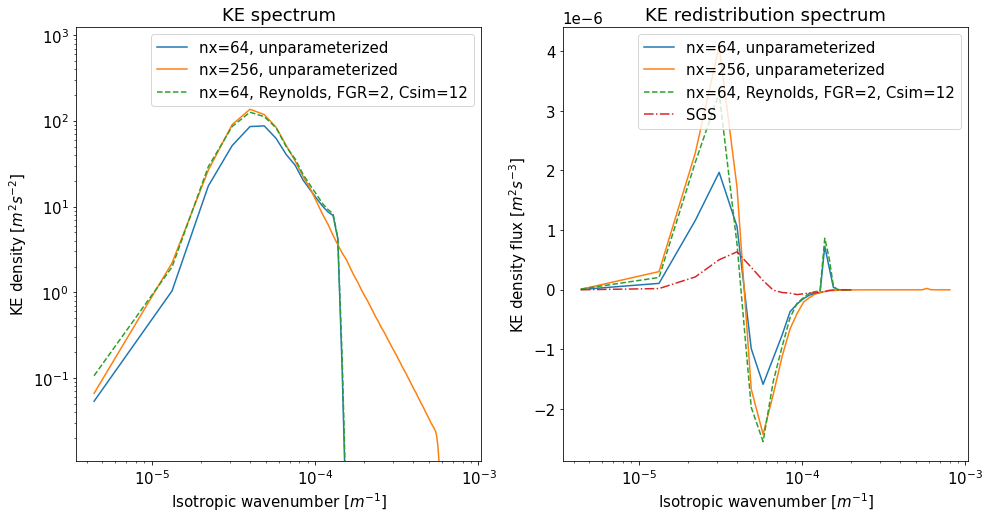

In [55]:
plot_models(m_lowres, m_highres, m_rey['FGR=2, Csim=12'])

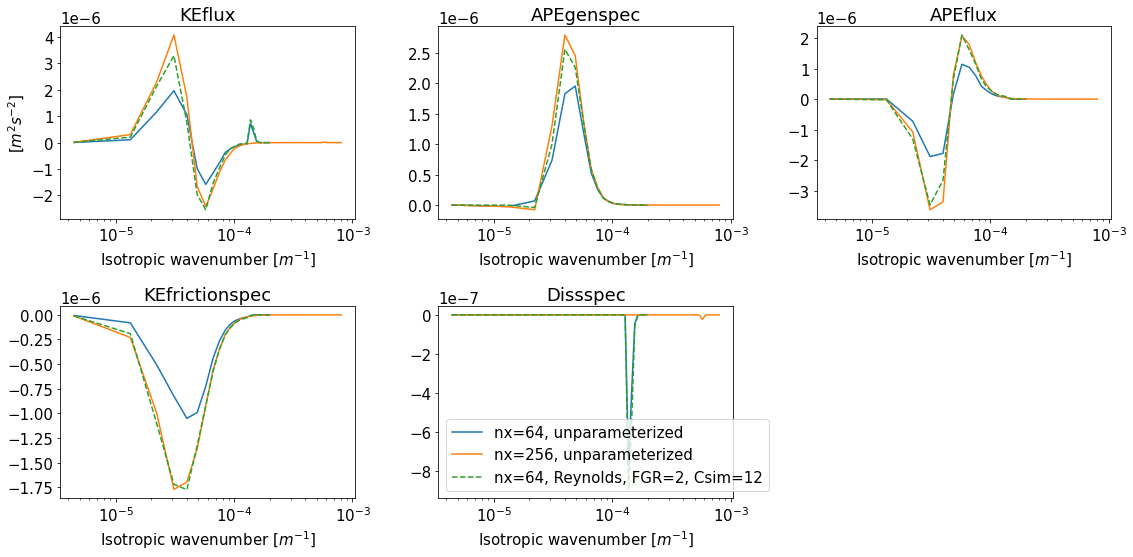

In [56]:
with matplotlib.rc_context({'font.size': 15}):
    plt.figure(figsize=(16,8))
    for i, label in enumerate(['KEflux', 'APEgenspec', 'APEflux', 'KEfrictionspec', 'Dissspec']):
        plt.subplot(2, 3, i+1, title=label)
        for j, m in enumerate([m_lowres, m_highres, m_rey['FGR=2, Csim=12']]):
            k, spec = calc_ispec(m, m.get_diagnostic(label))
            plt.semilogx(k, spec, **plot_kwargs_for(m))
        plt.xlabel("Isotropic wavenumber [$m^{-1}$]")
        if i == 0:
            plt.ylabel("[$m^{2}s^{-2}$]")
        if i == 4:
            plt.legend()
    plt.tight_layout()

In [57]:
sim_scores = pyqg.diagnostic_tools.diagnostic_similarities(m_rey['FGR=2, Csim=12'], m_highres, m_lowres)
sim_scores

{'Ensspec1': 0.7055746478677138,
 'Ensspec2': 0.6546838963301509,
 'KEspec1': 0.7864792604324689,
 'KEspec2': 0.887226703045829,
 'EKEdiss': 0.966466414445224,
 'KEfrictionspec': 0.8872267030458294,
 'EKE1': 0.8704108911235472,
 'EKE2': 0.9664664144452241,
 'Dissspec': -0.20785297656482382,
 'ENSDissspec': -0.215632440372038,
 'entspec': 0.4242647430164873,
 'ENSflux': -0.1473407104929274,
 'ENSgenspec': 0.6548524540693075,
 'ENSfrictionspec': 0.7459589914577125,
 'APEgenspec': 0.6548524540693074,
 'APEflux': 0.5508750821660978,
 'KEflux': 0.610490465504834,
 'APEgen': 0.6691960006755822}

In [58]:
sim_scores = pyqg.diagnostic_tools.diagnostic_similarities(m_param, m_highres, m_lowres)
sim_scores

{'Ensspec1': 0.4888418958751165,
 'Ensspec2': 0.4049502281576346,
 'KEspec1': 0.5418124055581908,
 'KEspec2': 0.669372809986729,
 'EKEdiss': 0.7438692906809308,
 'KEfrictionspec': 0.6693728099867287,
 'EKE1': 0.5595498603455029,
 'EKE2': 0.7438692906809232,
 'Dissspec': 0.44117936069036445,
 'ENSDissspec': 0.444465845936467,
 'entspec': 0.44944017062267627,
 'ENSflux': -0.13872215044782554,
 'ENSgenspec': 0.7343580121578472,
 'ENSfrictionspec': 0.5693634704631043,
 'APEgenspec': 0.7343580121578468,
 'APEflux': 0.5869230371522784,
 'KEflux': 0.5969978903541477,
 'APEgen': 0.8080529023642039}

# Transfer learning

In [72]:
year = 24*60*60*360.
common_params = dict(dt=3600., tmax=20*year, tavestart=10*year, twrite=25000, rek=7.000000e-08, delta=0.1, beta=1.0e-11)

In [73]:
%%time
m_jet_lowres = pyqg.QGModel(nx=64, **common_params)
m_jet_lowres.run()

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 1.27e-05, CFL: 0.007
INFO: Step: 50000, Time: 1.80e+08, KE: 1.76e-04, CFL: 0.035
INFO: Step: 75000, Time: 2.70e+08, KE: 1.85e-04, CFL: 0.039
INFO: Step: 100000, Time: 3.60e+08, KE: 1.53e-04, CFL: 0.037
INFO: Step: 125000, Time: 4.50e+08, KE: 1.50e-04, CFL: 0.039
INFO: Step: 150000, Time: 5.40e+08, KE: 1.57e-04, CFL: 0.038


CPU times: user 11min 25s, sys: 17min 55s, total: 29min 20s
Wall time: 2min 34s


In [74]:
%%time
m_jet_highres = pyqg.QGModel(nx=256, **common_params)
m_jet_highres.run()

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 2.88e-06, CFL: 0.023
INFO: Step: 50000, Time: 1.80e+08, KE: 1.84e-04, CFL: 0.154
INFO: Step: 75000, Time: 2.70e+08, KE: 1.88e-04, CFL: 0.158
INFO: Step: 100000, Time: 3.60e+08, KE: 2.19e-04, CFL: 0.184
INFO: Step: 125000, Time: 4.50e+08, KE: 2.38e-04, CFL: 0.207
INFO: Step: 150000, Time: 5.40e+08, KE: 2.43e-04, CFL: 0.189


CPU times: user 1h 7min 50s, sys: 1h 11min 19s, total: 2h 19min 10s
Wall time: 31min 40s


In [75]:
%%time
m_jet_rey = {}
for FGR in [2,]:#[1, 2, 3]:
    for Csim in [8, 12, 15, 20, 25]:#[20, 25]:
        print(f'Computing: FGR={FGR}, Csim={Csim}')
        m_jet_rey[f'FGR={FGR}, Csim={Csim}'] = pyqg.QGModel(nx=64, parameterization=Reynolds_stress(FGR=FGR, Csim=Csim),
                       **common_params)
        m_jet_rey[f'FGR={FGR}, Csim={Csim}'].run()
        

Computing: FGR=2, Csim=8


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 1.64e-05, CFL: 0.007
INFO: Step: 50000, Time: 1.80e+08, KE: 1.48e-04, CFL: 0.034
INFO: Step: 75000, Time: 2.70e+08, KE: 1.49e-04, CFL: 0.032
INFO: Step: 100000, Time: 3.60e+08, KE: 1.52e-04, CFL: 0.036
INFO: Step: 125000, Time: 4.50e+08, KE: 1.58e-04, CFL: 0.037
INFO: Step: 150000, Time: 5.40e+08, KE: 1.69e-04, CFL: 0.037


Computing: FGR=2, Csim=12


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 7.57e-06, CFL: 0.006
INFO: Step: 50000, Time: 1.80e+08, KE: 2.14e-04, CFL: 0.041
INFO: Step: 75000, Time: 2.70e+08, KE: 1.80e-04, CFL: 0.042
INFO: Step: 100000, Time: 3.60e+08, KE: 1.96e-04, CFL: 0.041
INFO: Step: 125000, Time: 4.50e+08, KE: 1.96e-04, CFL: 0.040
INFO: Step: 150000, Time: 5.40e+08, KE: 2.34e-04, CFL: 0.042


Computing: FGR=2, Csim=15


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 9.10e-06, CFL: 0.006
INFO: Step: 50000, Time: 1.80e+08, KE: 1.84e-04, CFL: 0.034
INFO: Step: 75000, Time: 2.70e+08, KE: 2.44e-04, CFL: 0.043
INFO: Step: 100000, Time: 3.60e+08, KE: 2.20e-04, CFL: 0.041
INFO: Step: 125000, Time: 4.50e+08, KE: 2.18e-04, CFL: 0.048
INFO: Step: 150000, Time: 5.40e+08, KE: 1.99e-04, CFL: 0.040


Computing: FGR=2, Csim=20


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 1.78e-06, CFL: 0.006
INFO: Step: 50000, Time: 1.80e+08, KE: 1.41e-04, CFL: 0.033
INFO: Step: 75000, Time: 2.70e+08, KE: 1.89e-04, CFL: 0.039
INFO: Step: 100000, Time: 3.60e+08, KE: 2.06e-04, CFL: 0.042
INFO: Step: 125000, Time: 4.50e+08, KE: 2.31e-04, CFL: 0.042
INFO: Step: 150000, Time: 5.40e+08, KE: 2.07e-04, CFL: 0.041


Computing: FGR=2, Csim=25


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 2.88e-06, CFL: 0.006
INFO: Step: 50000, Time: 1.80e+08, KE: 1.20e-04, CFL: 0.035
INFO: Step: 75000, Time: 2.70e+08, KE: 1.39e-04, CFL: 0.036
INFO: Step: 100000, Time: 3.60e+08, KE: 1.92e-04, CFL: 0.036
INFO: Step: 125000, Time: 4.50e+08, KE: 1.94e-04, CFL: 0.042
INFO: Step: 150000, Time: 5.40e+08, KE: 2.17e-04, CFL: 0.049


CPU times: user 2h 59min 49s, sys: 4h 38min 23s, total: 7h 38min 13s
Wall time: 41min 26s


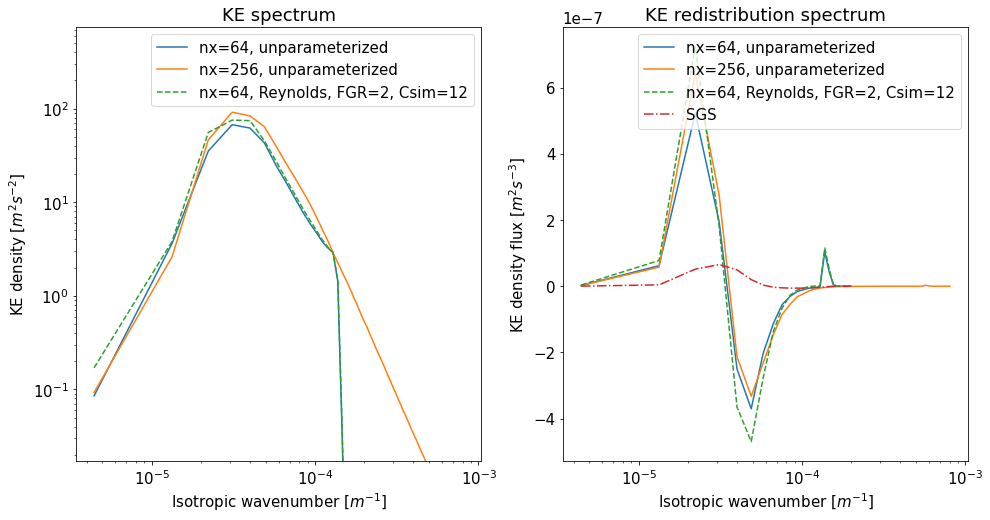

In [101]:
plot_models(m_jet_lowres, m_jet_highres, m_jet_rey['FGR=2, Csim=12'])

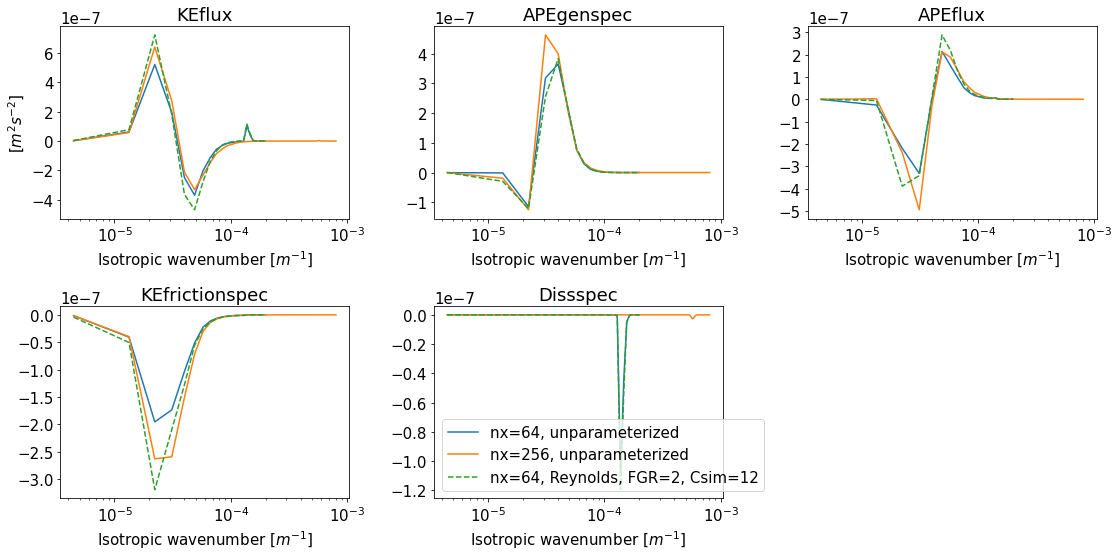

In [102]:
with matplotlib.rc_context({'font.size': 15}):
    plt.figure(figsize=(16,8))
    for i, label in enumerate(['KEflux', 'APEgenspec', 'APEflux', 'KEfrictionspec', 'Dissspec']):
        plt.subplot(2, 3, i+1, title=label)
        for j, m in enumerate([m_jet_lowres, m_jet_highres, m_jet_rey['FGR=2, Csim=12']]):
            k, spec = calc_ispec(m, m.get_diagnostic(label))
            plt.semilogx(k, spec, **plot_kwargs_for(m))
        plt.xlabel("Isotropic wavenumber [$m^{-1}$]")
        if i == 0:
            plt.ylabel("[$m^{2}s^{-2}$]")
        if i == 4:
            plt.legend()
    plt.tight_layout()

In [111]:
sim_scores = pyqg.diagnostic_tools.diagnostic_similarities(m_jet_rey['FGR=2, Csim=12'], m_jet_highres, m_jet_lowres)
sim_scores

{'Ensspec1': 0.19452074762400928,
 'Ensspec2': -0.894938582530129,
 'KEspec1': 0.2661093359069505,
 'KEspec2': 0.330914094301597,
 'EKEdiss': 0.9941272641882872,
 'KEfrictionspec': 0.33091409430159646,
 'EKE1': 0.40005600901372385,
 'EKE2': 0.9941272641882829,
 'Dissspec': -0.10230092711122118,
 'ENSDissspec': -0.10447815386558834,
 'entspec': 0.30054538482526305,
 'ENSflux': -0.13020381495679723,
 'ENSgenspec': -0.37822835082412576,
 'ENSfrictionspec': -0.4725018332957447,
 'APEgenspec': -0.37822835082412465,
 'APEflux': -0.5551559193215452,
 'KEflux': -0.23215012894086628,
 'APEgen': -0.5199769858614411}

In [112]:
print(np.mean(list(sim_scores.values())))

0.002397285934340379


In [105]:
%%time
m_jet_param = pyqg.QGModel(nx=64, parameterization=HybridSymbolic(),
                       **common_params)
m_jet_param.run()

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 6.16e-06, CFL: 0.006
INFO: Step: 50000, Time: 1.80e+08, KE: 1.63e-04, CFL: 0.031
INFO: Step: 75000, Time: 2.70e+08, KE: 1.76e-04, CFL: 0.038
INFO: Step: 100000, Time: 3.60e+08, KE: 1.87e-04, CFL: 0.045
INFO: Step: 125000, Time: 4.50e+08, KE: 1.95e-04, CFL: 0.042
INFO: Step: 150000, Time: 5.40e+08, KE: 2.10e-04, CFL: 0.043


CPU times: user 39min 22s, sys: 1h 36s, total: 1h 39min 58s
Wall time: 9min 10s


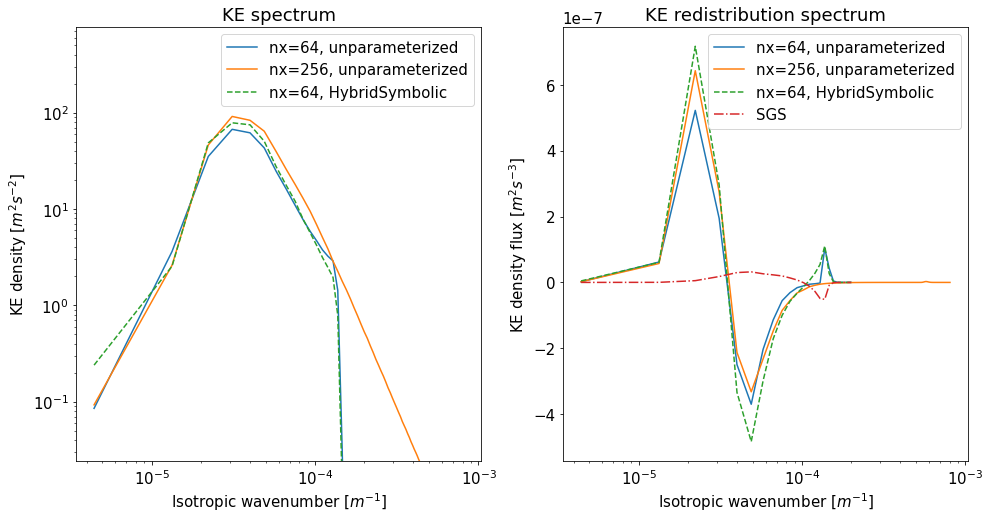

In [106]:
plot_models(m_jet_lowres, m_jet_highres, m_jet_param)

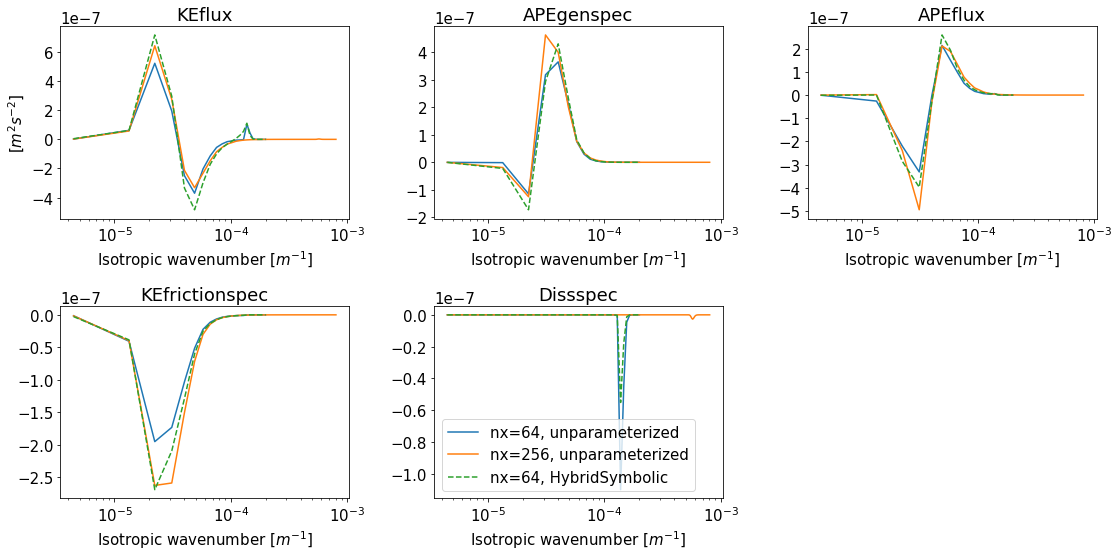

In [107]:
with matplotlib.rc_context({'font.size': 15}):
    plt.figure(figsize=(16,8))
    for i, label in enumerate(['KEflux', 'APEgenspec', 'APEflux', 'KEfrictionspec', 'Dissspec']):
        plt.subplot(2, 3, i+1, title=label)
        for j, m in enumerate([m_jet_lowres, m_jet_highres, m_jet_param]):
            k, spec = calc_ispec(m, m.get_diagnostic(label))
            plt.semilogx(k, spec, **plot_kwargs_for(m))
        plt.xlabel("Isotropic wavenumber [$m^{-1}$]")
        if i == 0:
            plt.ylabel("[$m^{2}s^{-2}$]")
        if i == 4:
            plt.legend()
    plt.tight_layout()

In [113]:
sim_scores = pyqg.diagnostic_tools.diagnostic_similarities(m_jet_param, m_jet_highres, m_jet_lowres)
sim_scores

{'Ensspec1': 0.37905026499864014,
 'Ensspec2': 0.1030974629851652,
 'KEspec1': 0.38997949751517225,
 'KEspec2': 0.5382000918757122,
 'EKEdiss': 0.7010775544948787,
 'KEfrictionspec': 0.5382000918757122,
 'EKE1': 0.3611185436315235,
 'EKE2': 0.7010775544948784,
 'Dissspec': 0.5123990102577981,
 'ENSDissspec': 0.5153402556184938,
 'entspec': 0.3617377665855379,
 'ENSflux': -0.1426740216530391,
 'ENSgenspec': -0.20302415311326838,
 'ENSfrictionspec': 0.1745760649076692,
 'APEgenspec': -0.20302415311327038,
 'APEflux': 0.18443168769294915,
 'KEflux': 0.05308860181493569,
 'APEgen': -0.1408175160308922}

In [114]:
print(np.mean(list(sim_scores.values())))

0.26799081137992203


## Potential hackathon activity 2: Learn a parameterization from data

Offline, we've generated a dataset of coarsened high resolution states and associated subgrid forcing. Can you use this dataset to learn a parameterization?

In [30]:
def get_pregenerated(path, dataset_url="https://g-402b74.00888.8540.data.globus.org"):
    mapper = fsspec.get_mapper(f"{dataset_url}/{path}.zarr")
    return xr.open_zarr(mapper, consolidated=True)

forcing_dataset = get_pregenerated("eddy/forcing1")

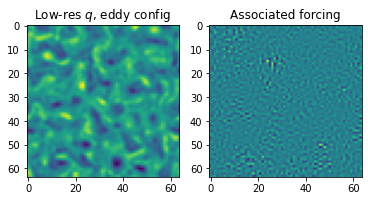

In [31]:
plt.subplot(121)
plt.imshow(forcing_dataset.q.isel(lev=0, time=-1, run=-1))
plt.title("Low-res $q$, eddy config")
plt.subplot(122)
plt.imshow(forcing_dataset.q_subgrid_forcing.isel(lev=0, time=-1, run=-1))
plt.title("Associated forcing")
plt.show()

In [32]:
# write some code!